### Climate Changes and Factors Responsible

##### In this notebook we will explore how has the temperature changed in last few decades.
##### We will also have a look at the major factors responsible for these changes

###### 1. Loading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('climate_change.csv')

In [4]:
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


### Is there any trend between temp and months?

<AxesSubplot:xlabel='Month', ylabel='Temp'>

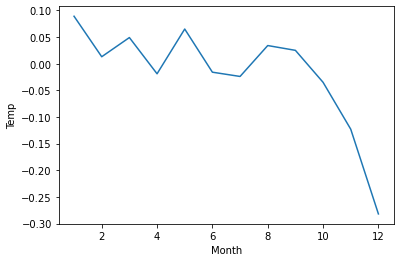

In [111]:
# For year 1984
sns.lineplot(x = df[df['Year'] == 1984]['Month'], y = df[df['Year'] == 1984]['Temp'])

<AxesSubplot:xlabel='Month', ylabel='Temp'>

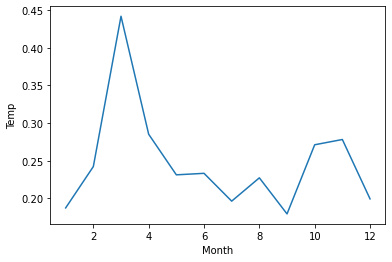

In [6]:
# For year 1990
sns.lineplot(x = df[df['Year'] == 1990]['Month'], y = df[df['Year'] == 1990]['Temp'])

#### Nothing can be said just by looking at the above trends hence let's analyse the AvgTemp Vs Month

In [7]:
months = [i for i in range(1, 13)]

In [8]:
import statistics as stats

In [9]:
stats.mean(df[df['Month'] == 1]['Temp'])

0.26844

In [10]:
months_vs_avgTemp = dict()
for m in months:
    months_vs_avgTemp[m] = stats.mean(df[df['Month'] == m]['Temp'])
print(months_vs_avgTemp)

{1: 0.26844, 2: 0.29092, 3: 0.2864, 4: 0.26804, 5: 0.244, 6: 0.25634615384615383, 7: 0.26515384615384613, 8: 0.27442307692307694, 9: 0.24446153846153845, 10: 0.24461538461538462, 11: 0.2173846153846154, 12: 0.22446153846153846}


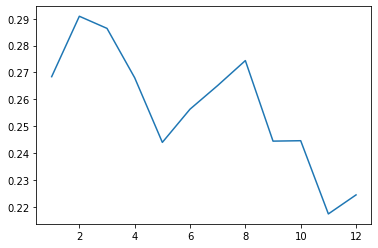

In [11]:
# plot of avgTemp vs Month of the year
sns.lineplot(data=months_vs_avgTemp)
sns.xlabel = 'Month Number'
sns.ylabel = 'Avg Temp of the Month'

#### It can be deduced from the above graph that:

##### <span style = 'color:red'> 1. Feb has the highest avgTemp</span>
##### <span style = 'color:red'>2. Avg Temp Gradually decreases by the end of the year i.e. IT IS WINTER IN MOST OF THE COUNTRIES    DURING LATER HALF OF THE YEAR</span>
 

### Temperature Trend with Year

In [106]:
allYears = np.array(list(set(df['Year'])))
year_vs_temp = dict()  # to store avg temp of corresponding year

In [107]:
# Finding avg temp of each year
# saving the found avg as value and the year as key
for y in allYears:
    year_vs_temp[y] = stats.mean(df[df['Year'] == y]['Temp'])

<AxesSubplot:>

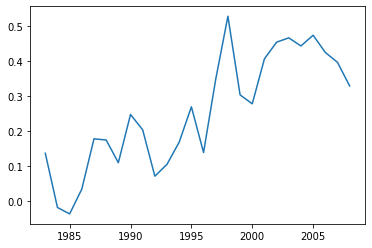

In [109]:
sns.lineplot(data=year_vs_temp)

#### It can be concluded that avgTemp <span style='color:red'> increased till 2002 </span> but after that <span style='color:red'> it is consistently DECREASING</span>

###### 2. Data Visualization

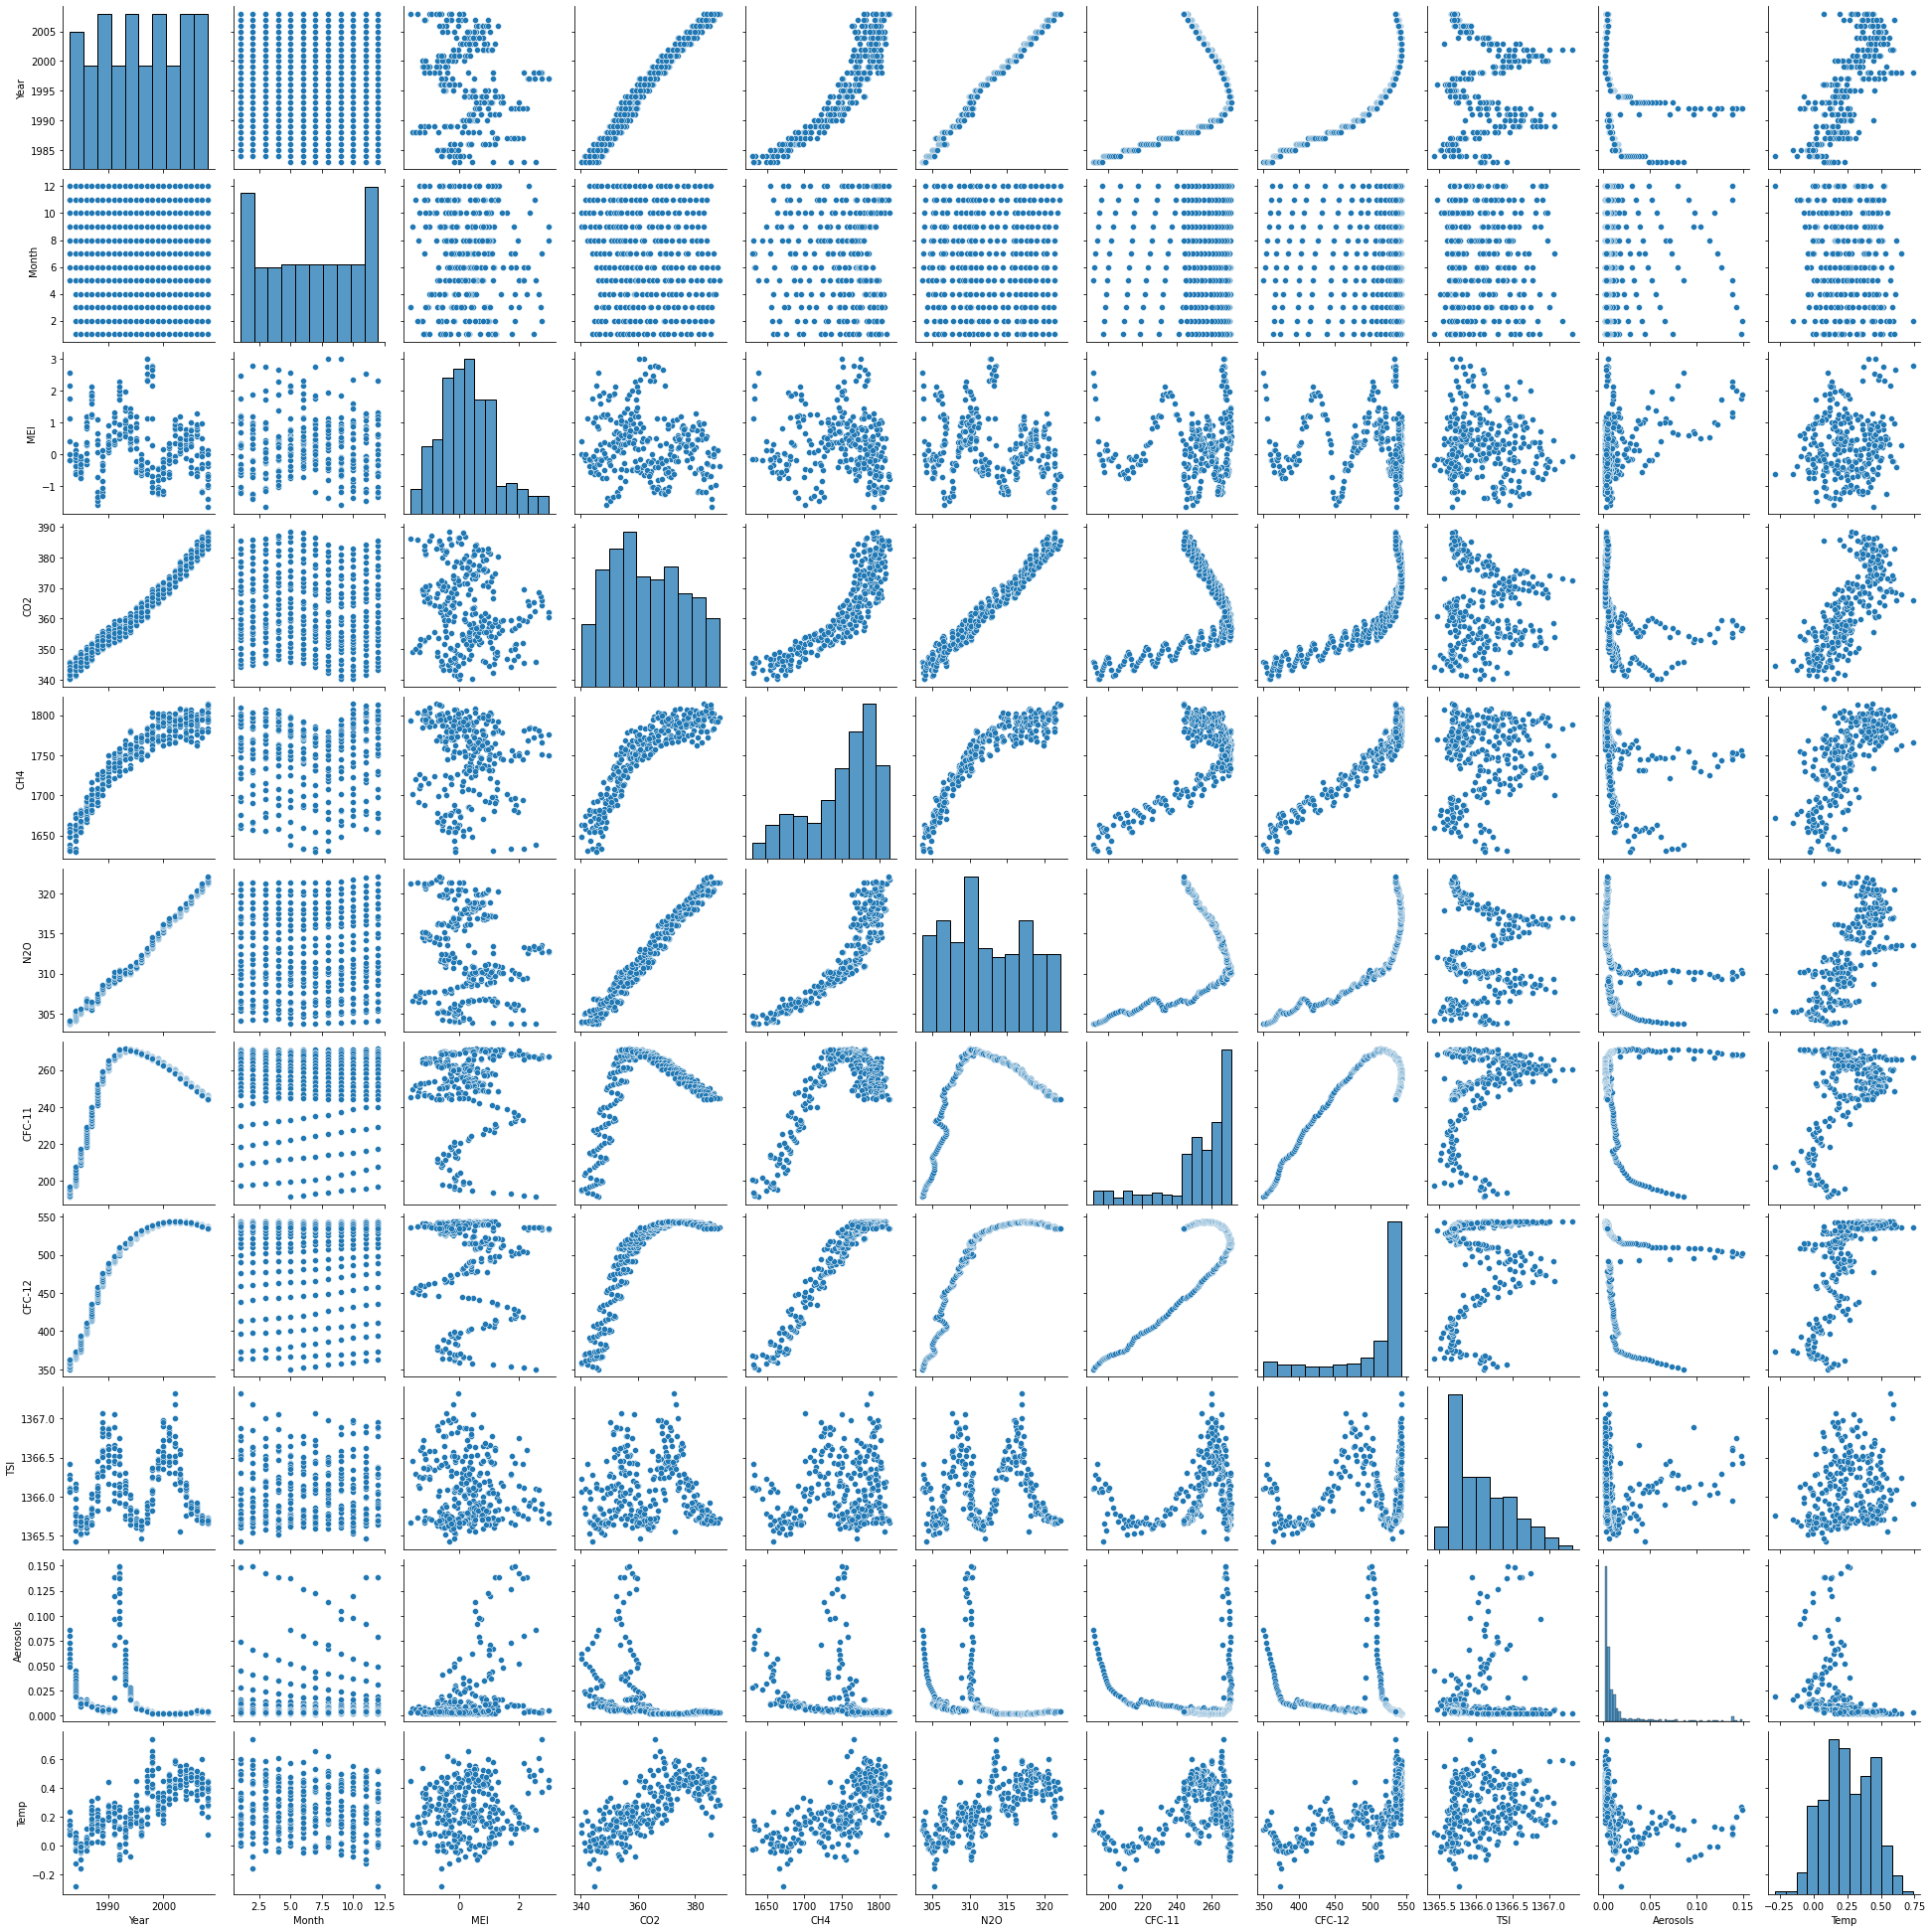

In [12]:
sns.pairplot(data=df)

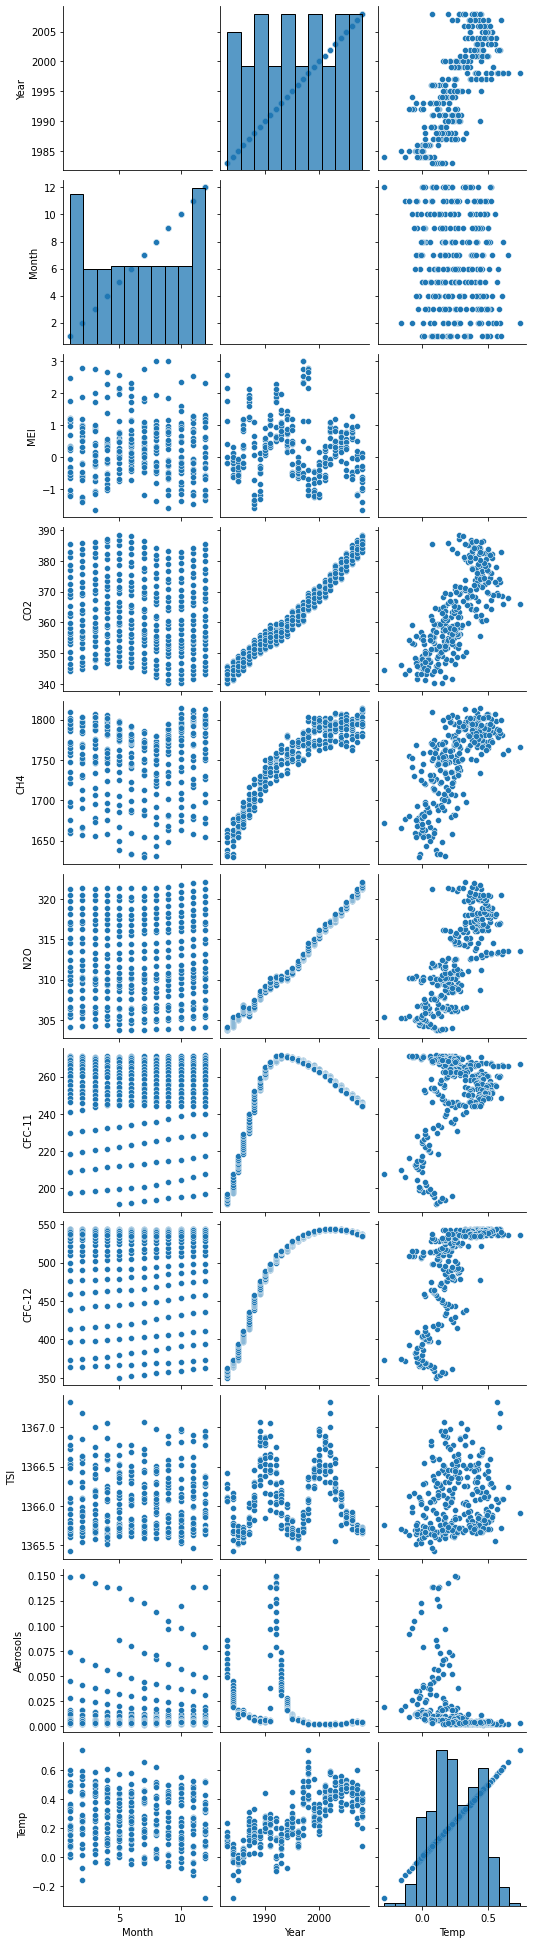

In [13]:
sns.pairplot(data=df, x_vars=['Month', 'Year', 'Temp'])

From the above plots it can be deduced that:
   1. CO2, CH4 and N2O have been consistently increasing in atmosphere
   2. Aerosol content has decreased by a huge factor from 1990
   3. Average Temperature is also consistenly increasing in most of the part
   4. CFC has also decreased after 2000

###### NOTE : The <span style="color:red">increase in some of the gas content </span> can have a direct impact on the <span style="color:red"> increase in avg temperature</span>.

###### Let's Check the Huristic mentioned above

###### 3. Splitting the Data into train set and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['CH4', 'CO2', 'N2O', 'CFC-12']],
                                                    df['Temp'],
                                                    test_size=0.35,
                                                    random_state=42)

###### 4. Linear Regression Model

In [16]:
df.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [17]:
from sklearn.linear_model import LinearRegression as L

In [18]:
model = L()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)

In [21]:
def correct_prediction(args):
    predicted, actual = args
    return True if abs(actual - predicted) // actual <= 0.1 else False
#     return abs(actual - predicted)

In [22]:
result = list(map(correct_prediction, [(predictions[x], y_test.values[x]) for x in range(len(predictions))]))

In [23]:
result.count(True) / len(result) * 100

85.18518518518519

In [24]:
model.coef_

array([-0.00027457,  0.00682178,  0.00554079,  0.00075604])

In [25]:
X_train.columns

Index(['CH4', 'CO2', 'N2O', 'CFC-12'], dtype='object')

In [26]:
# current positive imacts : CO2, 'N2O'

##### Hence we can conclude that <span style="color:red"> CO2 </span> and <span style="color:red"> N2O </span> have a major impact on Global Warming

In [98]:
avg_CO2_2008 = stats.mean(df['CO2'])
avg_N2O_2008 = stats.mean(df['N2O'])

In [112]:
print('CO2 {0} ppm'.format(avg_CO2_2008), 'N2O {0} ppb'.format(avg_N2O_2008))

CO2 363.2267532467532 ppm N2O 312.3918344155844 ppb


In [113]:
print(f'contribution of CO2 is proportional to : {avg_CO2_2008 / 0.00682178}')
print(f'contribution of N2O is proportional to : {avg_N2O_2008 * 1000 / 0.00554079}')

contribution of CO2 is proportional to : 53245.15789819566
contribution of N2O is proportional to : 56380377.9633562


##### We can also conclude from above ratio that <span style="color:red"> N2O damages a lot more than CO2</span>